###Data reference (Human Outer Radial Glia): 

In [1]:
import sys
sys.path.insert(0, './auxiliary_functions/')
import single_cell_analysis as sc
import plotting_functions as plotf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 1.5})

%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams.update({'font.size': 16}) 

In [2]:
# ------------ Processed data can be downloaded in the supplementary information of the paper:
#              http://www.sciencedirect.com/science/article/pii/S0092867415011241
# Table S1 has the information about the cells, while table S2 has the expression of the genes

D = {}
D['info']  = pd.read_csv('../data/HumanOuterRadialGlia_TableS1.csv', index_col=None, header=0)
D['data']  = pd.read_csv('../data/HumanOuterRadialGlia_TableS2.csv', index_col=0, header=0)
D['class'] = pd.DataFrame([i[0] for i in D['data'].columns], index=D['data'].columns, columns=['__class']).T
D['data'].head()

,O9-A6,O9-B5,O9-B8,O9-D2,O9-E2,O9-F4,O9-F5,O9-G9,O10-A4,O10-D1,...,O9-G12,O10-G4,O8-H1,S37-B4,S37-F12,S38-H11,Hi_GW16_10,Hi_GW16_26,Hi_GW16_7,Hi_GW16_9
DDX11L1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
WASH7P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.09624,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.620579,0.0,0.0,0.0
MIR1302-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
D['info'].index = D['info']['Cell'].values
D['info'] = D['info'].T
D['info']

,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Cell,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Anatomical Source,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,...,VZ,VZ,VZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ
Age,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,...,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16
"LibrarySize (Read Pairs, Million)",2.106,2.81493,2.97857,2.07449,1.91691,2.43096,2.85678,2.9554,2.49103,2.35668,...,7.15369,8.03316,10.4257,10.1684,8.51763,10.3586,6.19076,7.33805,7.93595,9.5622
MappedPairs,0.854531,1.32159,1.35072,0.554413,0.94399,0.831268,1.01963,1.10254,0.945783,1.33814,...,2.57236,2.03606,2.03835,5.4746,1.94727,2.49483,1.30793,1.32857,3.59705,1.57776
"AlignmentRate, Pairs",41.8%,48.0%,46.5%,27.6%,50.3%,35.0%,36.7%,38.4%,38.8%,58.1%,...,37.7%,28.6%,21.0%,57.9%,24.5%,25.8%,22.6%,19.6%,49.5%,17.6%
GenesTagged,4460,3009,4714,3079,2856,3744,3607,3010,2981,1439,...,2982,4176,2999,3717,4256,3396,5623,2891,2270,2588


Using cells only from the VZ. Num cells =  179


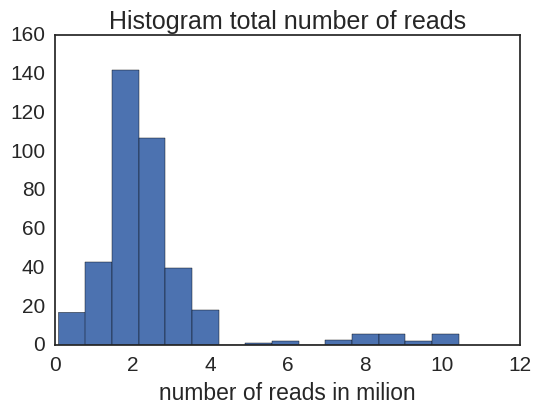

In [4]:
# --------- checking the distribuition of the total number of reads of the cells. --------------
plt.hist(D['info'].loc['LibrarySize (Read Pairs, Million)'], bins=15)
plt.xlabel('number of reads in milion')
plt.title('Histogram total number of reads')

# -- only cells from the Ventricular Zone (VZ) and with more than 1million reads are selected --
t_minreads = D['info'].loc['LibrarySize (Read Pairs, Million)'].values>1
t_vz       = D['info'].loc['Anatomical Source']=='VZ'  
t_svz      = D['info'].loc['Anatomical Source']=='SVZ'
D['VZ']  = D['info'].columns[t_vz  & t_minreads]
D['SVZ'] = D['info'].columns[t_svz & t_minreads]

print 'Using cells only from the VZ. Num cells = ', len(D['info'].loc['Cell'][D['VZ']])
D['data']  = D['data'][D['VZ']]
D['class'] = D['class'][D['VZ']]

# Using log2 scale, and adding 1.0 to avoid -inf
D['data']  = np.log2(D['data']+1.0)

In [5]:
# Biologically relevant lists of genes. 
#The markers were selected according to the list suggested in the paper (Pollen et al 2015)

l ={'RG' :  ['SLC1A3','SOX2','PAX6','PDGFD','GLI3']
   ,'vRG':  ['CRYAB', 'PDGFD', 'TAGLN2', 'FBXO32', 'PALLD']
   ,'oRG':  ['HOPX', 'PTPRZ1', 'TNC', 'FAM107A', 'MOXD1']
   ,'IP' :  ['EOMES', 'ELAVL4', 'NEUROG1', 'NEUROD1', 'NEUROD4','PPP1R17','PENK']
   ,'Hes':  ['HES1','HES5']
   ,'Id' :  ['ID1','ID2','ID3','ID4']
   }

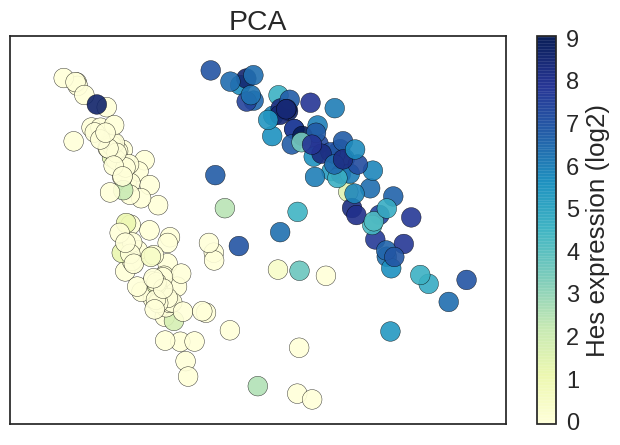

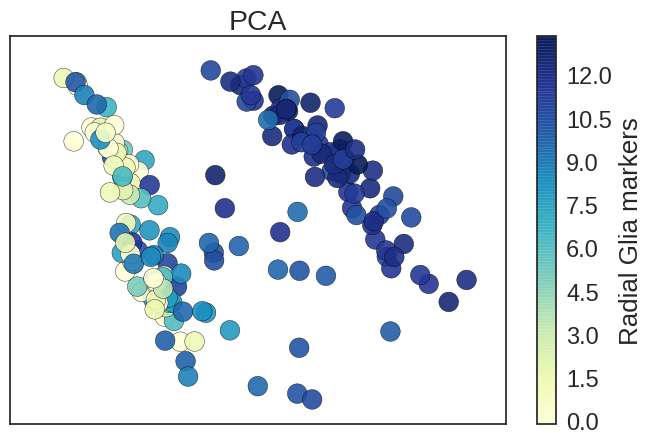

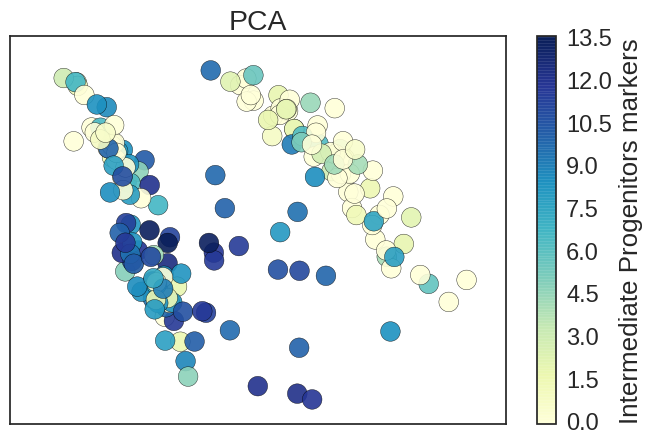

In [9]:
x = sc.get_expression(D['data'], l['Hes'], log2_scale=True)
plotf.dimensional_reduction(D['data'], clabel='Hes expression (log2)', marker=None, mds=False, pc=[0,1], cbar=True,
                            c=x, xticks=[], yticks=[])

x = sc.get_expression(D['data'], l['RG'], log2_scale=True)
plotf.dimensional_reduction(D['data'], clabel='Radial Glia markers', marker=None, mds=False, pc=[0,1], cbar=True,
                            c=x, xticks=[], yticks=[])

x = sc.get_expression(D['data'], l['IP'], log2_scale=True)
plotf.dimensional_reduction(D['data'], clabel='Intermediate Progenitors markers', marker=None, mds=False, pc=[0,1], 
                            cbar=True, c=x, clim=None,  xticks=[], yticks=[])


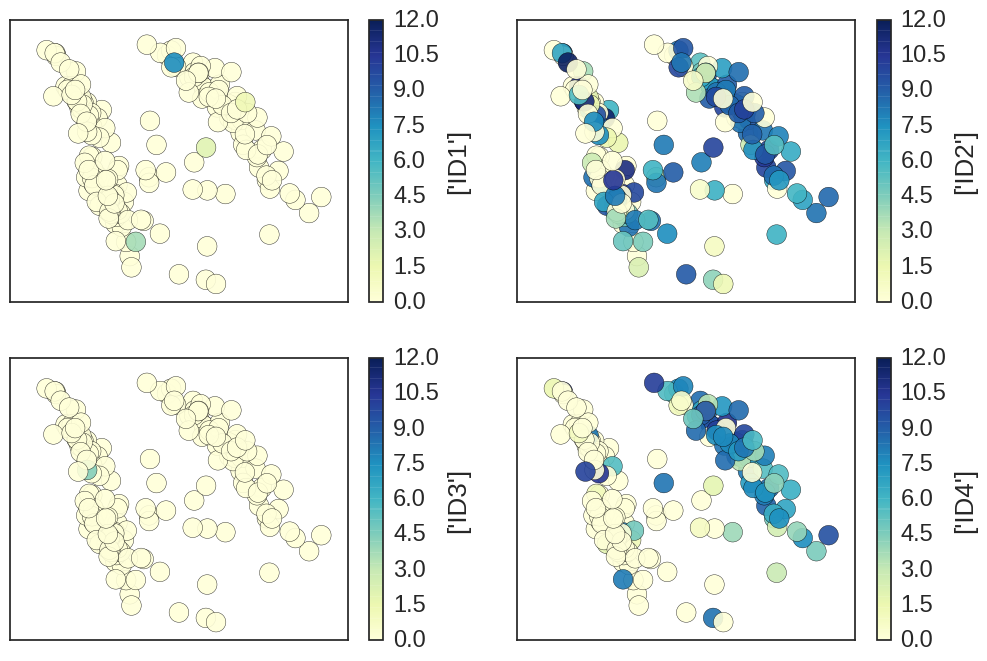

In [10]:
cmap='RdBu_r'
sns.set_style('white')
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3})
sns.despine()

f = plt.subplots(2, 2, figsize=(12, 8))
list_genes = [['ID1'],['ID2'],['ID3'],['ID4']]


for i in range(len(list_genes)):
    if i<2:
        ax = plt.subplot2grid((2, 2), (0, i), colspan=1, rowspan=1)
    else:
        ax = plt.subplot2grid((2, 2), (1, i-2), colspan=1, rowspan=1)
    x = sc.get_expression(D['data'], list_genes[i])
    plotf.dimensional_reduction(D['data'], clabel=list_genes[i], marker=None, mds=False, pc=[0,1], cbar=True,
                                c=x, clim=[0, 12], ax=ax, title='')
plt.savefig('IDs_embryoBrain.pdf', format='pdf')